In [116]:
import warnings
warnings.filterwarnings('ignore')

In [117]:
#Text pre-processing
"""removes punctuation, stopwords, and returns a list of the remaining words, or tokens"""
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\VenuGopal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\VenuGopal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [118]:
# Cleaning the text
import string

def text_process(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    4. Remove words
    '''
    stemmer = WordNetLemmatizer()
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join([i for i in nopunc if not i.isdigit()])
    nopunc =  [word.lower() for word in nopunc.split() if word not in stopwords.words('english')]
#   Print each chunk
#   print([stemmer.lemmatize(word) for word in nopunc]) 
    return [stemmer.lemmatize(word) for word in nopunc]

In [119]:
# importing libraries 
import speech_recognition as sr 
import os 
from pydub import AudioSegment
from pydub.silence import split_on_silence

# create a speech recognition object
r = sr.Recognizer()

# a function that splits the audio file into chunks
# and applies speech recognition
def get_large_audio_transcription(path):
    
    # Cleaned paragraph from given audio file
    cleaned_paragraph = []
    
    """
    Splitting the large audio file into chunks
    and apply speech recognition on each of these chunks
    """
    # open the audio file using pydub
    sound = AudioSegment.from_wav(path)  
    # split audio sound where silence is 700 miliseconds or more and get chunks
    chunks = split_on_silence(sound,
        # experiment with this value for your target audio file
        min_silence_len = 500,
        # adjust this per requirement
        silence_thresh = sound.dBFS-14,
        # keep the silence for 1 second, adjustable as well
        keep_silence=500,
    )
    folder_name = "audio-chunks"
    # create a directory to store the audio chunks
    if not os.path.isdir(folder_name):
        os.mkdir(folder_name)
    whole_text = ""
    # process each chunk 
    for i, audio_chunk in enumerate(chunks, start=1):
        # export audio chunk and save it in
        # the `folder_name` directory.
        chunk_filename = os.path.join(folder_name, f"chunk{i}.wav")
        audio_chunk.export(chunk_filename, format="wav")
        # recognize the chunk
        with sr.AudioFile(chunk_filename) as source:
            audio_listened = r.record(source)
            # try converting it to text
            try:
                text = r.recognize_google(audio_listened)
            except sr.UnknownValueError as e:
                print("Error:", str(e))
            else:
                text = f"{text.capitalize()}. "
                print(chunk_filename, ":", text)
                cleaned_paragraph += text_process(text)
                whole_text += text
    # return the text for all chunks detected
    print("\nCleaned Paragraph :\n",cleaned_paragraph)
    return whole_text

In [120]:
path = "audio_file2.wav"
print("\nFull text : \n", get_large_audio_transcription(path))

audio-chunks\chunk1.wav : His about which she had fixed a bug for country seat. 
audio-chunks\chunk2.wav : Are short distance to the city. 
audio-chunks\chunk3.wav : Just that what is now called dutch street. 
audio-chunks\chunk4.wav : Should bounded with proofs of his ingenuity. 
audio-chunks\chunk5.wav : And smoke jack. 
audio-chunks\chunk6.wav : Required host version. 
audio-chunks\chunk7.wav : Church of windsor was to meet without fire. 
audio-chunks\chunk8.wav : Chords for the horses. 
audio-chunks\chunk9.wav : Weather cox it turned against the wind and other one headed could try with this. 
audio-chunks\chunk10.wav : Rustom stand confounded o b holders. 

Cleaned Paragraph :
 ['his', 'fixed', 'bug', 'country', 'seat', 'are', 'short', 'distance', 'city', 'just', 'called', 'dutch', 'street', 'should', 'bounded', 'proof', 'ingenuity', 'and', 'smoke', 'jack', 'required', 'host', 'version', 'church', 'windsor', 'meet', 'without', 'fire', 'chord', 'horse', 'weather', 'cox', 'turned', '

In [121]:
# Part 2

In [122]:
# Import libraries for implementing K-Means Clustering

from smart_open import smart_open
from gensim.models import Word2Vec
import numpy as np
from sklearn.cluster import KMeans
from sklearn import cluster
from sklearn import metrics
from sklearn.decomposition import PCA

In [123]:
str1 = "milk and water liquids"
str2 = "drink water and milk"
str3 = "this is the learning good deep good book"
str4 = "water no colour milk white"
str5 = "one more book"
str6 = "time railway station"
str7 = "time railway station train"
str8 = "india pakistan match"
str9 = "india pakistan war"
str10 = "train railway station"
str11 = "india blue pakistan green"

sentences = [text_process(str1)]+[text_process(str2)]+[text_process(str3)]+[text_process(str4)]+\
[text_process(str5)]+[text_process(str6)]+[text_process(str7)]+[text_process(str8)]+\
[text_process(str9)]+[text_process(str10)]+[text_process(str11)]

print(sentences)

[['milk', 'water', 'liquid'], ['drink', 'water', 'milk'], ['learning', 'good', 'deep', 'good', 'book'], ['water', 'colour', 'milk', 'white'], ['one', 'book'], ['time', 'railway', 'station'], ['time', 'railway', 'station', 'train'], ['india', 'pakistan', 'match'], ['india', 'pakistan', 'war'], ['train', 'railway', 'station'], ['india', 'blue', 'pakistan', 'green']]


In [124]:
model = Word2Vec(sentences, size = 50, min_count = 1, sg = 1)

In [125]:
def vectorizer(sentence, model):
    vector = []
    numOfWords = 0
    for word in sentence:
        try:
            if numOfWords == 0:
                vector = model[word]
            else:
                vector = np.add(vector, model[word])
            
            numOfWords += 1
        except:
            pass
    
    return np.asarray(vector)/numOfWords

In [126]:
l = []

for sentence in sentences:
    l.append(vectorizer(sentence, model))
    
X = np.array(l)

print(X.shape)

(11, 50)


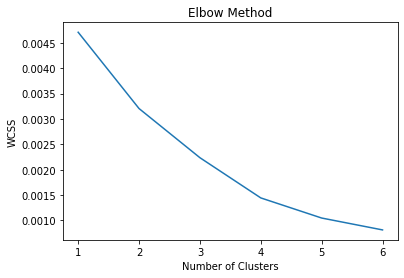

In [127]:
import matplotlib.pyplot as plt

# Within cluster sum of squares

wcss = []

for i in range(1,7):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,7), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

plt.show()

In [128]:
# Hence, from The Elbow Method, n_clusters = 4

n_clusters = 4

clf = KMeans(n_clusters=n_clusters, max_iter=100, init='k-means++', n_init=1)

labels = clf.fit_predict(X)

print(labels)

for index, sentence in enumerate(sentences):
    print(str(labels[index]) + " : " + str(sentence))

[3 3 0 3 0 2 2 1 1 2 1]
3 : ['milk', 'water', 'liquid']
3 : ['drink', 'water', 'milk']
0 : ['learning', 'good', 'deep', 'good', 'book']
3 : ['water', 'colour', 'milk', 'white']
0 : ['one', 'book']
2 : ['time', 'railway', 'station']
2 : ['time', 'railway', 'station', 'train']
1 : ['india', 'pakistan', 'match']
1 : ['india', 'pakistan', 'war']
2 : ['train', 'railway', 'station']
1 : ['india', 'blue', 'pakistan', 'green']
